In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ISLP import load_data

In [2]:
df_boston = load_data("Boston")

# train test split
feat_cols = [col for col in df_boston.columns if col != 'medv']
features = df_boston.loc[:, feat_cols]
targets = df_boston.loc[:, 'medv']

features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    targets, 
                                                    test_size=0.2, 
                                                    random_state=24)

# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
# construct the covariance matrix
covariance_mat = np.cov(X_train_std.T)
covariance_mat.shape

(12, 12)

In [12]:
# eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_mat)
eigenvalues

array([0.06408882, 0.16755795, 0.18172887, 0.2224492 , 0.26804456,
       0.39321281, 0.48946638, 0.79556686, 0.83965684, 1.16295556,
       1.45600747, 5.98904135])

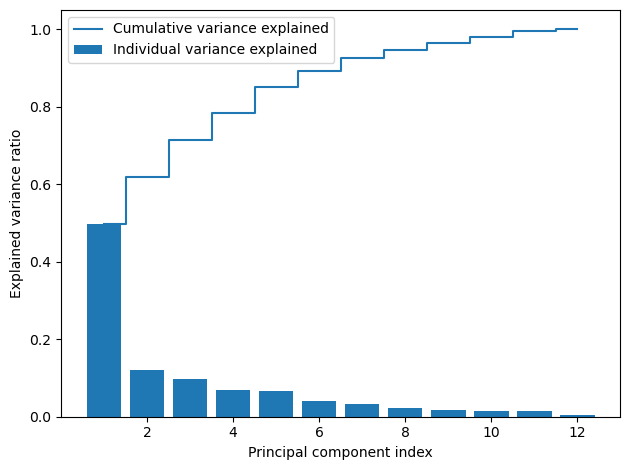

In [16]:
# variance explained ratio
tot = sum(eigenvalues)
var_explained = [eigenval / tot for eigenval in sorted(eigenvalues, 
                                                            reverse=True)]
cumulative_var_explained = np.cumsum(var_explained)

import matplotlib.pyplot as plt
plt.bar(range(1, 13), 
        var_explained, 
        align='center', 
        label='Individual variance explained')
plt.step(range(1, 13), 
         cumulative_var_explained, 
         where='mid', 
         label='Cumulative variance explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key= lambda x: x[0], reverse=True)

In [24]:
# projection matrix
W = np.hstack([eigenpairs[i][1][:, np.newaxis] for i in range(6)])
W.shape

(12, 6)

In [25]:
# project the data
X_train_pca = X_train_std.dot(W)
X_train_std.shape, X_train_pca.shape

((404, 12), (404, 6))